# A Python implementation of gradient descent

I implemented gradient descent approach in Python with dynamic learning rate and early stopping. 

If loss function continue to decrease, multiply learning rate by a constant (eg 1.05) every epoch. Otherwise decrease learning rate, divide learning rate by that constant

If loss function decrement is less than a set amount, trigger early stopping

As shown in the results, the vanilla gradient descent takes 12s to finish running the full 1000 epoches. While gradient descent with dynamic learning rate and early stopping takes just 0.087s running only 30 epoches, with even higher accuracy. It shows dynamic gradient descent with early stopping can save significant amount of time and resource. 

Alex Chen

---
Code adapt from: 

-# COURSE: A deep understanding of deep learning

-## SECTION: Gradient descent

-### LECTURE: Gradient descent in 1D

-#### TEACHER: Mike X Cohen, sincxpress.com

-##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202210

In [38]:
# import all necessary modules
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from typing import Callable

from IPython import display
# display.set_matplotlib_formats('svg')

In [39]:
def make_plot(x:np.array, fx:Callable, deriv:Callable, localmin:float=None) -> None:
    '''creates plot using input array x and the function as well as its derivative
    If a local minima is provided, plot the point as well'''
    plt.plot(x,fx(x), x,deriv(x))
    if localmin is not None:
        plt.plot(localmin,deriv(localmin),'ro')
        plt.plot(localmin,fx(localmin),'ro')
        plt.title('Empirical local minimum: %s'%localmin[0])

    plt.xlim(x[[0,-1]])
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(['f(x)','df','f(x) min'])
    
    plt.show()

# Gradient descent in 1D

In [40]:
# define the function and the derivative of that function calculated by hand(as a function)
def fx(x):
  # artifically increate function evaluation cost
  time.sleep(0.01)
  return x ** 2 + 1

# derivative function
def deriv(x):
  # artifically increate function evaluation cost
  time.sleep(0.01)
  return 2 * x

In [41]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# make_plot(x, fx, deriv)

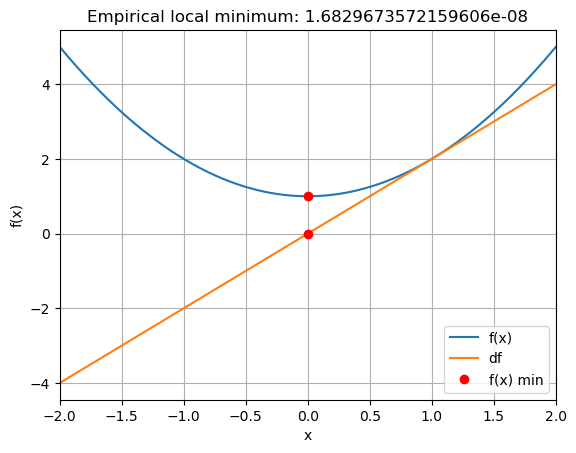

CPU times: user 203 ms, sys: 12.9 ms, total: 216 ms
Wall time: 12.3 s


In [42]:
%%time
# gradient descent vanilla
# random starting point
localmin = np.array([10])

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

# plot the results
make_plot(x, fx, deriv, localmin)

Early stopping triggered at epoch:  30


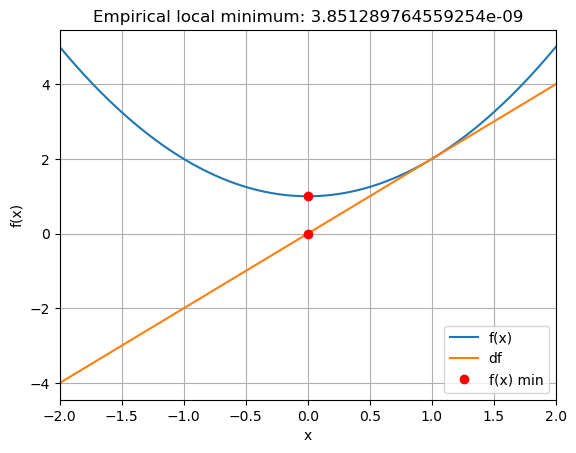

CPU times: user 172 ms, sys: 3.75 ms, total: 175 ms
Wall time: 877 ms


In [48]:
%%time
# If loss function continue to decrease, multiply learning rate by a constant (eg 1.05) every epoch. 
# Otherwise decrease learning rate, divide learning rate by that constant
# If loss function decrement is less than a set amount, trigger early stopping
localmin = np.array([10])

# learning parameters
learning_rate = .1
learning_rate_adjuster = 1.05
early_stopping_threshold = 0.999999999999999
training_epochs = 1000

loss = fx(localmin)
# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  # find new loss function value, if lower than previous one then increase learning rate. Otherwise decrease
  old_loss = loss
  loss = fx(localmin)
  # dynamic adjust learning rate
  if loss < old_loss:
    learning_rate = learning_rate * learning_rate_adjuster
  # early stopping 
  if (loss < old_loss) & (loss / old_loss > early_stopping_threshold):
    print('Early stopping triggered at epoch: ', i)
    break
# plot the results
make_plot(x, fx, deriv, localmin)